In [421]:
import warnings

warnings.filterwarnings("ignore")

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [423]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [424]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

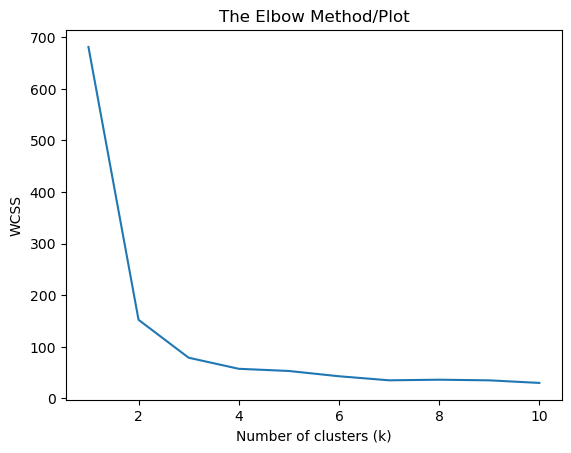

In [425]:
from sklearn.cluster import KMeans, k_means

wcss = []


for i in range(1, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method/Plot")
plt.xlabel("Number of clusters (k)")

plt.ylabel("WCSS")
plt.show()

In [426]:
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(x)

y_kmeans = kmeans_model.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

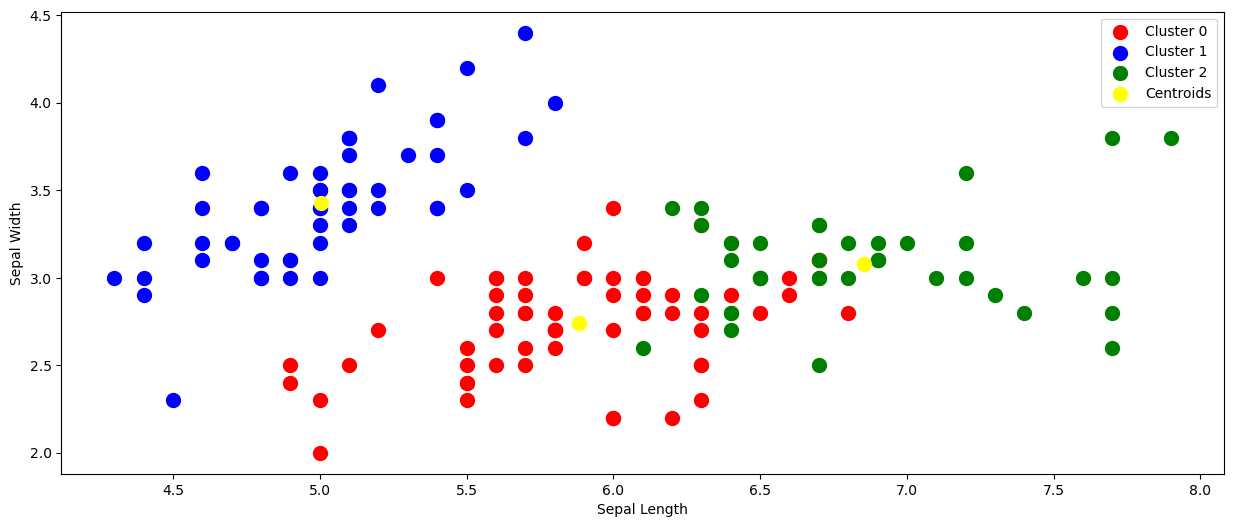

In [427]:
plt.figure(figsize=(15, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c="red", label="Cluster 0")
plt.scatter(
    x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 1"
)
plt.scatter(
    x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c="green", label="Cluster 2"
)

plt.scatter(
    kmeans_model.cluster_centers_[:, 0],
    kmeans_model.cluster_centers_[:, 1],
    s=100,
    c="yellow",
    label="Centroids",
)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [428]:
kmeans_model.predict([[1.2, 3.4, 5.5, 6.7]])[0]

0

In [429]:
from numpy import random, array, float64


def create_clustered_data(N, k):
    random.seed(10)
    points_per_cluster = float(N) / k
    X = []
    for i in range(k):
        income_centroid = random.uniform(20_000, 200_000)
        age_centroid = random.uniform(20.0, 70.0)
        for j in range(int(points_per_cluster)):
            X.append(
                [
                    random.normal(income_centroid, 10_000),
                    random.normal(age_centroid, 2.0),
                ]
            )
    X = array(X)
    return X

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


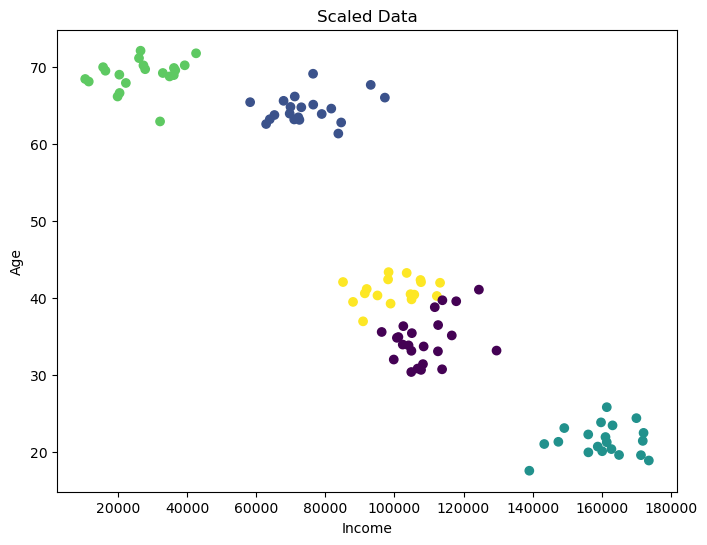

In [430]:
from sklearn.preprocessing import scale

data = create_clustered_data(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(scale(data))

print(model.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(float64))
plt.title("Scaled Data")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 1 1 1 4 4 1 1 4 1 4 4
 4 1 1 4 4 4 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]


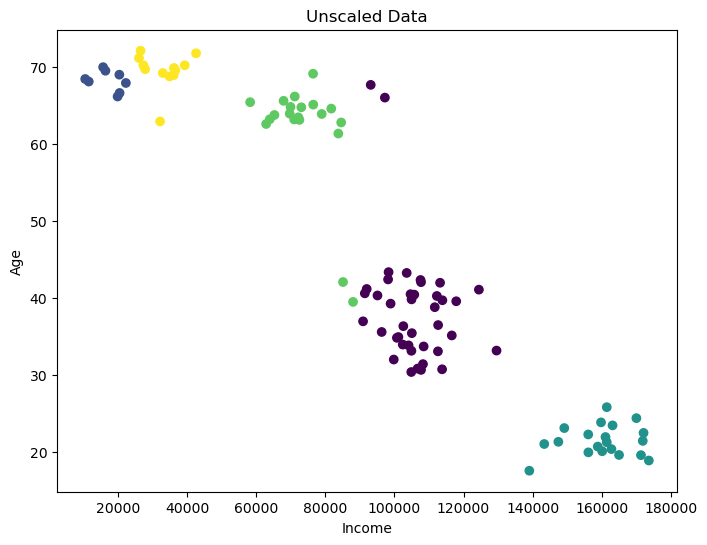

In [431]:
from sklearn.preprocessing import scale

data = create_clustered_data(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(data)

print(model.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(float64))
plt.title("Unscaled Data")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

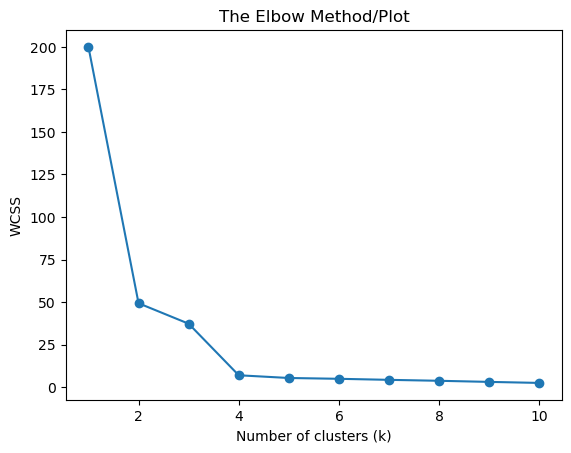

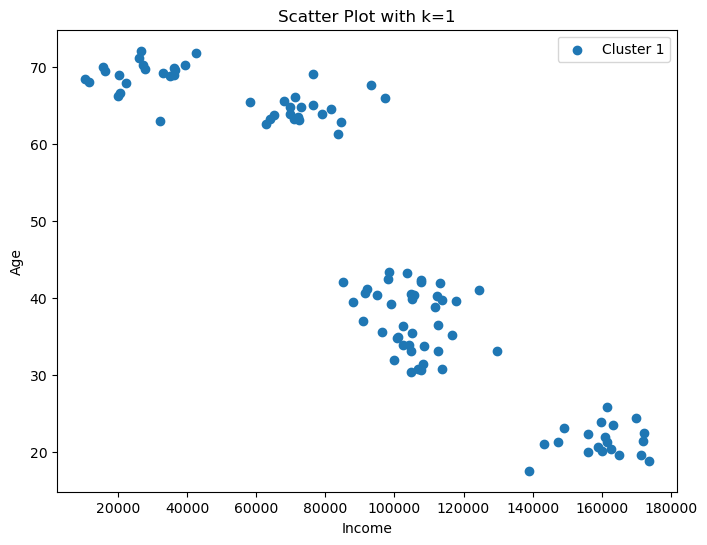

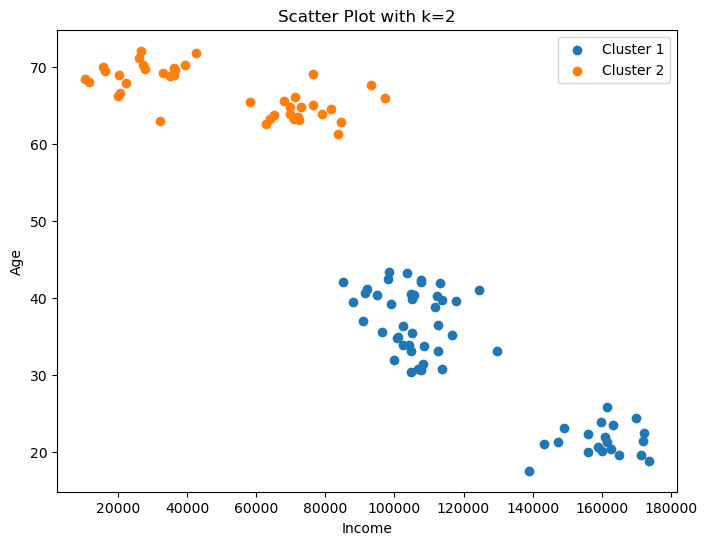

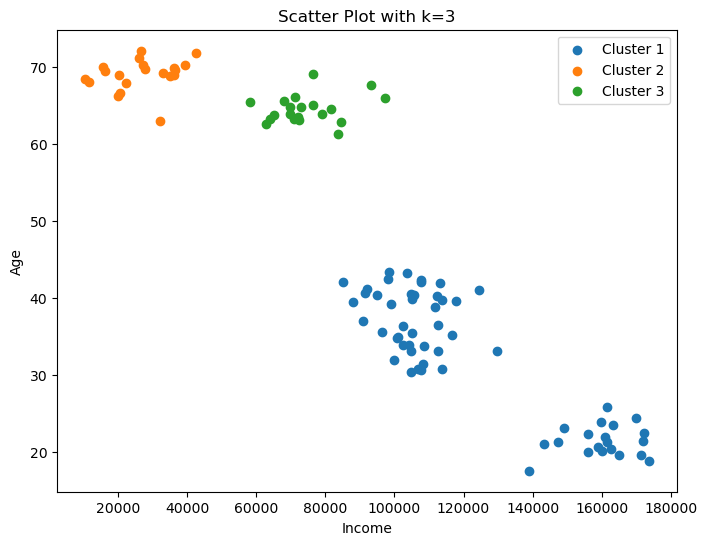

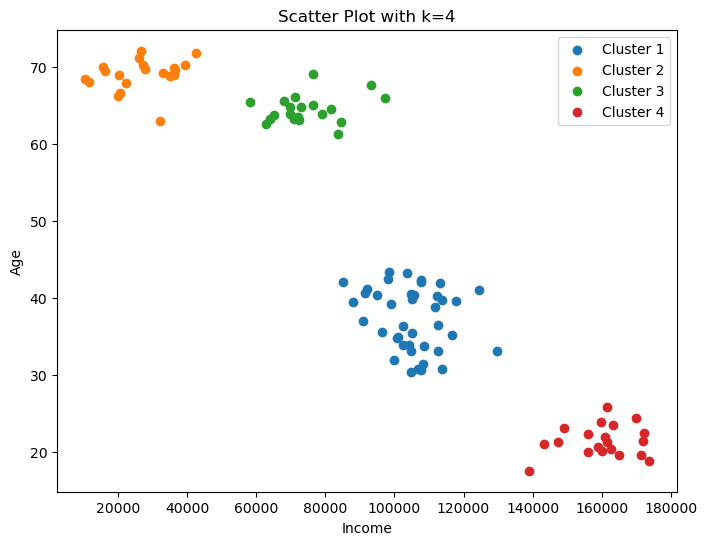

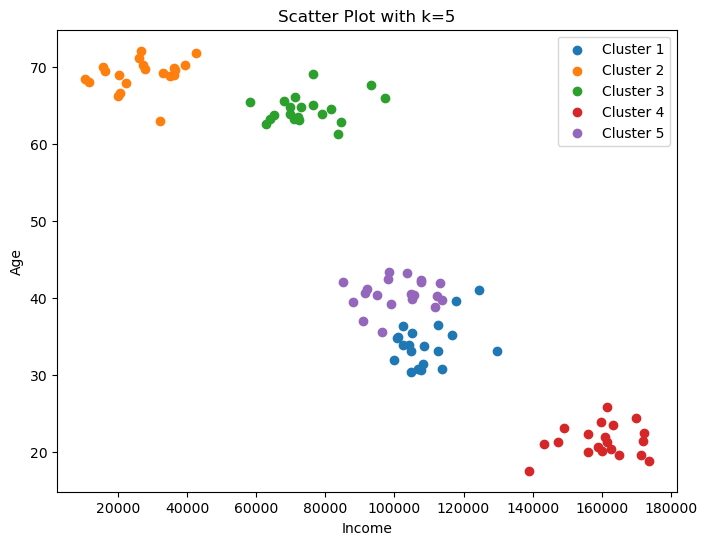

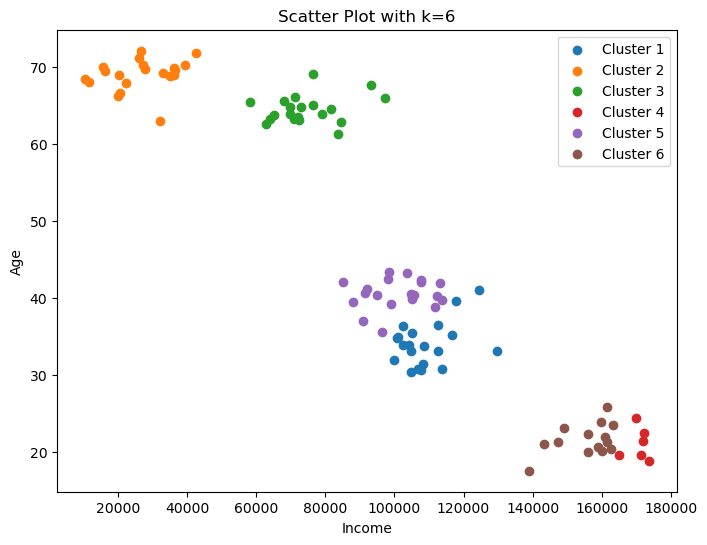

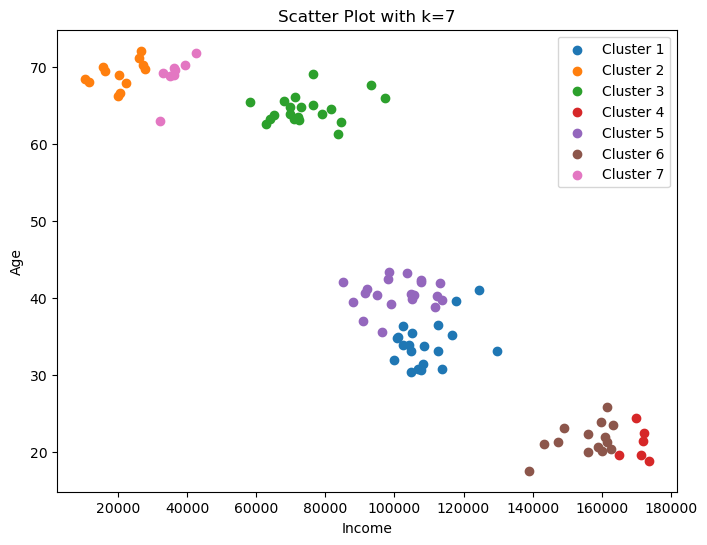

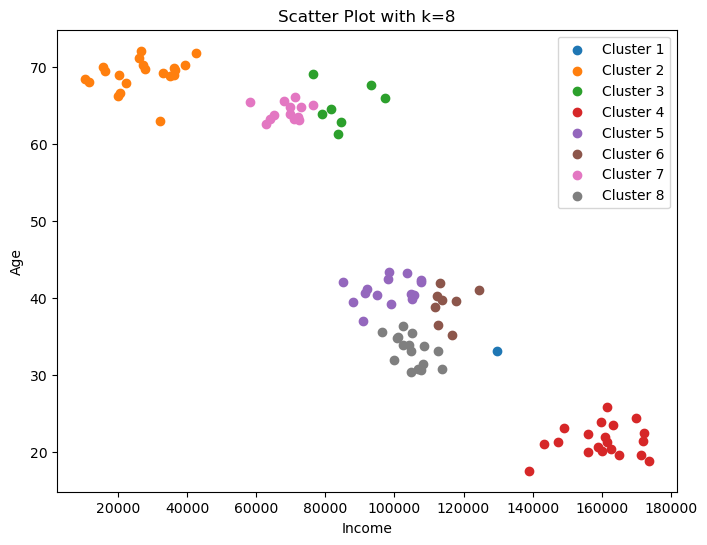

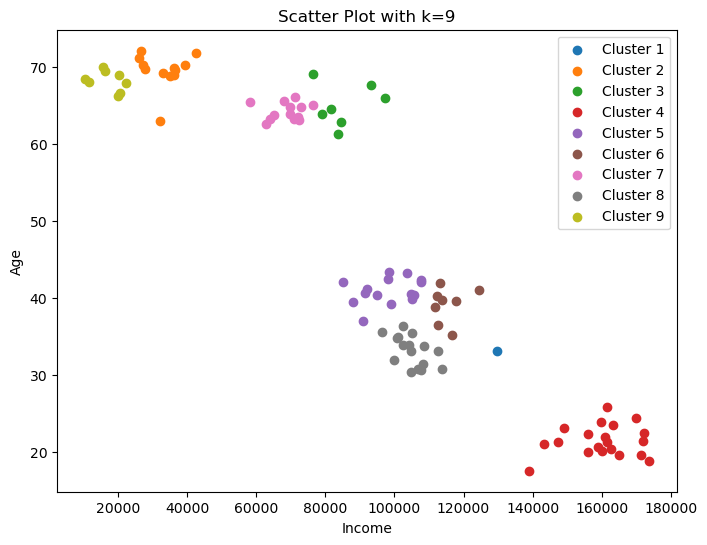

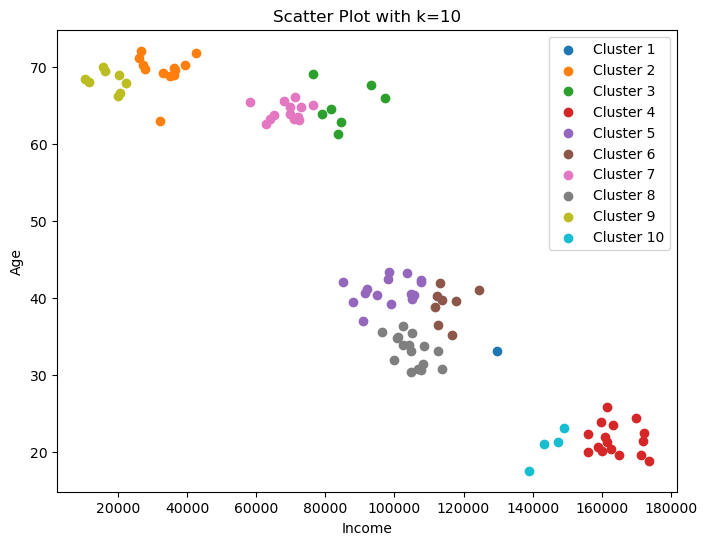

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


data = create_clustered_data(100, 5)


wcss = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(scale(data))
    wcss.append(k_means.inertia_)


plt.figure()
plt.plot(range(1, 11), wcss, marker="o")
plt.title("The Elbow Method/Plot")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()


for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(scale(data))
    labels = k_means.labels_

    plt.figure(figsize=(8, 6))

    
    for j in np.unique(labels):
        plt.scatter(
            data[labels == j, 0],
            data[labels == j, 1],
            label=f"Cluster {j+1}",
            cmap="plasma",
        )

    plt.title(f"Scatter Plot with k={i}")
    plt.xlabel("Income")
    plt.ylabel("Age")
    plt.legend()
    plt.show()

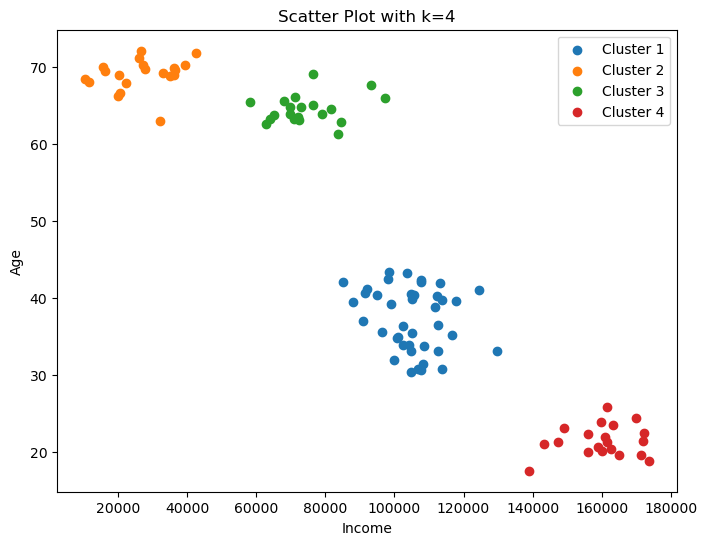

In [433]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(scale(data))

k_means.predict(scale([[26, 100_000]]))[0]

0

1. **What happens if you don't scale the data?**

When the data is scaled, the clusters are clearly defined. However, there are some clusters that overlap when the data is unscaled.
   
2. What happnes if you choose different number of K?
3. New data point, which cluster it will fall under?